In [1]:
import numpy as np
from modeltesting import neutrinos as HNL
import ipywidgets as widgets
import matplotlib.pyplot as plt

In [4]:
print(HNL.__file__)

c:\Users\nimer\Science_science\modeltesting\modeltesting\neutrinos\__init__.py


In [2]:
priors = HNL.neutrino_priors('n')

In [ ]:
priors([0.05, 0.07, 0.1], [0.3, 0.5, 0.7])

In [3]:
print(HNL.neutrino_priors.__doc__)



# Documentation for `neutrino_priors` and Nested `_` Function

## `neutrino_priors(hierarchy)`

### Overview

The `neutrino_priors` function handles the extraction of neutrino priors from a `.npy` file. It returns a vectorized function that takes sets of \( (x_e, x_{\mu}) \) and returns the corresponding priors.

### Parameters

- `hierarchy` (string): The type of hierarchy (e.g., "NH" for Normal Hierarchy or "IH" for Inverted Hierarchy).

### Returns

- Vectorized function `_`: This function accepts input in the forms \( \_(	ext{array}(x_e), 	ext{array}(x_{\mu})) \) and \( \_(	ext{array}(x_e, x_{\mu})) \) of shape \( (N, 2) \) or \( (2, N) \).

### Example Usage

```python
prior_func = neutrino_priors("NH")
priors = prior_func(array_xe, array_xmu)
```

### Internals

- The function uses `scipy.interpolate.RegularGridInterpolator` to create a vectorized function from the loaded `.npy` data.

---

## Nested Function `_(*args, grid=False)`

### Overview

The nested function `_` takes e

In [5]:
priors([0.07, 0.05, 0.03, 0.5], [0.4,0.5,0.6, 0.2])
print

array([0.99966543, 0.99956093, 0.98186311, 0.        ])

(100, 100)


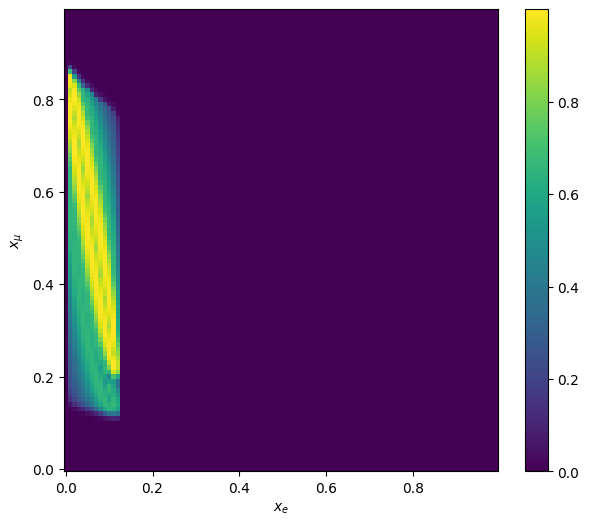

In [13]:
x = np.linspace(0.00, 1, 100, endpoint=False)
y = np.linspace(0.00, 1, 100, endpoint=False)
vals = priors(x, y, grid = True)
print(vals.shape)
plt.figure(figsize=(7,6))
plt.pcolormesh(x, y, vals.T)
plt.xlabel('$x_e$')
plt.ylabel('$x_{\\mu}$')
# plt.contourf(x, y, vals)
plt.colorbar()
plt.show()


In [18]:
priors([0.1, 0.2, 0.3], [0.4,0.5,0.6], grid = True)
# priors([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])

array([[0.99001042, 0.6787437 , 0.59262157],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ]])

In [2]:
HNL.CasasIbarra_2(hierarchy = 'n', eta = 0, imomega = 5, reomega = 0)

array([[ -14.3850231  -21.26885793j,   14.38154122 +21.2694849j ],
       [ 135.92814492+103.26756592j, -135.95970695-103.26775434j],
       [  99.10774022 -85.6281615j ,  -99.1319468  +85.62831773j]])

In [6]:
deg = np.pi/180
HNL.CasasIbarra_2({'theta23':0.842, 'delta':3.87, 'dm2atm':2.523e-3},
                        hierarchy = 'i', 
                        eta = np.pi/2, imomega = 2, reomega = np.pi/2)

array([[ 1.28454939e+00+9.42935293e-17j, -1.30366463e+00-9.61437203e-17j],
       [ 6.52497722e-02+4.56574335e-02j, -5.11429167e-02-4.13131453e-02j],
       [ 6.38885718e-03-1.66738902e-02j, -2.63450905e-04+1.18983009e-02j]])

In [7]:
deg = np.pi/180
HNL.CasasIbarra_3({'theta23':0.842, 'delta':3.87, 'dm2atm':2.523e-3, 'eta1':0.5, 'eta2':1.5},
    hierarchy = 'i', 
    mnu0 = 0.1,
    imomega1 = 4, reomega1 = 0.1, 
    imomega2 = -2, reomega2 = 0.3, 
    imomega3 = 4, reomega3 = 0.9
)

array([[ 1.15141141e+05-3.96734150e+05j, -1.15167947e+05+3.96264529e+05j,
         2.67973657e+01+4.69554113e+02j],
       [ 5.69731854e+03-4.89716385e+03j, -5.69344980e+03+4.88997677e+03j,
        -3.89092557e+00+7.18107712e+00j],
       [ 7.69547591e+05-1.31355168e+06j, -7.69162199e+05+1.31184675e+06j,
        -3.85406852e+02+1.70490113e+03j]])

In [2]:
def mixing_ratios(eta, imomega = 10, reomega = 0, **kwargs):
    mu2 = HNL.CasasIbarra_2(eta = eta, imomega = imomega, reomega = reomega, **kwargs)
    mu2 = np.sum(np.abs(mu2), axis = 1)
    return mu2/np.sum(mu2)

def mixing_ratios_2(eta, imomega = 10, reomega = 0):
    mu2 = HNL.CasasIbarra_2(hierarchy = 'i', eta = eta, imomega = imomega, reomega = reomega)
    mu2 = np.abs(mu2)
    mu2 = mu2/np.sum(mu2, axis = 0)[np.newaxis, :]
    return mu2

In [32]:
def _(eta, imomega = 10, reomega = 0):
    
    a, b = mixing_ratios_2(eta, imomega, reomega).T
    plt.figure(figsize = (5, 5))
    plt.scatter(a[0], a[1])
    plt.scatter(b[0], b[1])
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.show()

widgets.interact(_, eta = widgets.FloatSlider(min = 0, max = 6.28, step = 0.01, value = 0.5),
                 imomega = widgets.FloatSlider(min = -5, max = 5, step = 0.01, value = 0),
                    reomega = widgets.FloatSlider(min = 0, max = 6.28, step = 0.01, value = 0))

interactive(children=(FloatSlider(value=0.5, description='eta', max=6.28, step=0.01), FloatSlider(value=0.0, d…

<function __main__._(eta, imomega=10, reomega=0)>

In [9]:
HNL.NuFITIH['dm2sol'], HNL.NuFITIH['dm2atm']

(5e-05, 0.001)

In [17]:
etas = np.linspace(0, 2*np.pi, 1000)
import ipywidgets as widgets
from matplotlib.collections import LineCollection

def _(delta, theta12, theta13, theta23, dm2sol, dm2atm):
    vals = np.array([mixing_ratios(eta, imomega = -6, reomega = eta, 
                                   hierarchy = 'i',
                                   delta = delta,
                                    theta12 = theta12,
                                    theta13 = theta13,
                                    theta23 = theta23,
                                    dm2sol = dm2sol,
                                    dm2atm = dm2atm
                                   ) for eta in etas])
    
    
    points = np.array([vals[:,0], vals[:,1]]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    # Create a LineCollection from the segments and set the colormap
    lc = LineCollection(segments, cmap='rainbow')

    fig, ax = plt.subplots(figsize = (6,6))
    reduced_etas = np.copy(etas)
    reduced_etas[reduced_etas > np.pi] -= np.pi
    lc.set_array(np.abs(reduced_etas))  # Set the values used for colormapping

    ax.add_collection(lc)  # Add the LineCollection to the axes
    ax.autoscale()
    
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    
    plt.colorbar(lc, ax=ax)  # Add colorbar, optional
    plt.show()

bestfit = HNL.NuFITIH
widgets.interact(_, 
                delta = widgets.FloatSlider(min = 0, max = 6.28, step = 0.01, value = bestfit['delta']),
                theta12 = widgets.FloatSlider(min = 0, max = 6.28, step = 0.01, value = bestfit['theta12']),
                theta13 = widgets.FloatSlider(min = 0, max = 6.28, step = 0.01, value = bestfit['theta13']),
                theta23 = widgets.FloatSlider(min = 0, max = 6.28, step = 0.01, value = bestfit['theta23']),
                dm2sol = widgets.FloatSlider(min = 1e-5, max = 1e-4, step = 1e-5, value = bestfit['dm2sol']),
                dm2atm = widgets.FloatSlider(min = 5e-4, max = 5e-3, step = 1e-4, value = bestfit['dm2atm'])
                 )


interactive(children=(FloatSlider(value=4.991641660703783, description='delta', max=6.28, step=0.01), FloatSli…

<function __main__._(delta, theta12, theta13, theta23, dm2sol, dm2atm)>

In [10]:
etas = np.linspace(0, 6.28, 1000)
vals = np.array([mixing_ratios(eta, imomega = 3, reomega = eta) for eta in etas])
# vals2 = np.array([mixing_ratios(eta, imomega = 3, reomega = 0.*eta) for eta in etas])

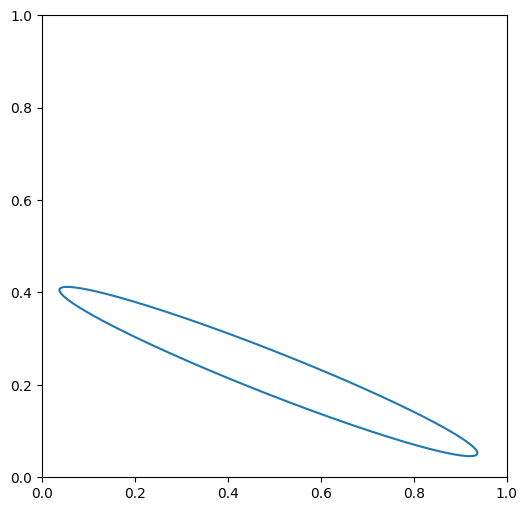

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize = (6,6))
plt.plot(vals[:, 0], vals[:,1])
# plt.plot(vals2[:, 0], vals2[:,1])
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

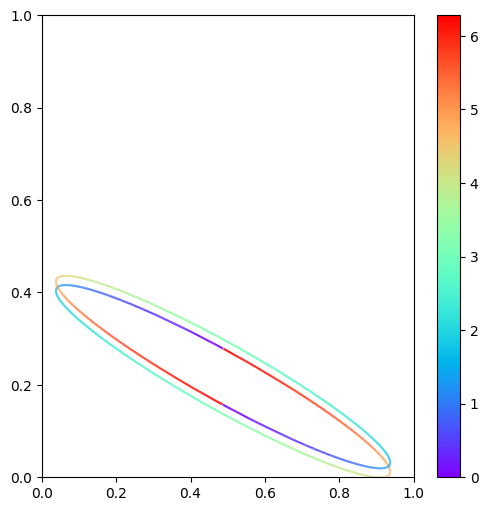

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

# Create the plot
fig, ax = plt.subplots(figsize = (6,6))
lcs = []
for om in [-3, 3]:
    # Generate some example data
    vals = np.array([mixing_ratios(eta, imomega = om, reomega = 0.*eta) for eta in etas])
    x = vals[:, 0]
    y = vals[:, 1]+om/300
    z = etas  # This could be any function z(x, y)

    # Create segments
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    # Create a LineCollection from the segments and set the colormap
    lcs.append(LineCollection(segments, cmap='rainbow'))
    lcs[-1].set_array(z)  # Set the values used for colormapping

    ax.add_collection(lcs[-1])  # Add the LineCollection to the axes
    ax.autoscale()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

plt.colorbar(lcs[0], ax=ax)  # Add colorbar, optional
plt.show()
